# **Smart Traffic Management (accident /traffic prediction)**

# IMPORT NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORT REQUIRED DATASET

In [4]:
traffic_df = pd.read_csv('/content/bangalore-cas-alerts.csv')
traffic_df.head(5)

deviceCode_deviceCode  deviceCode_location_latitude  \
0        864504031502210                     12.984595   
1        864504031502210                     12.984595   
2        864504031502210                     12.987233   
3        864504031502210                     12.987233   
4        864504031502210                     12.987503   

   deviceCode_location_longitude deviceCode_location_wardName  \
0                      77.744087                     Kadugodi   
1                      77.744087                     Kadugodi   
2                      77.741119             Garudachar Playa   
3                      77.741119             Garudachar Playa   
4                      77.740051                         Hudi   

  deviceCode_pyld_alarmType  deviceCode_pyld_speed  \
0                       PCW                     32   
1                       PCW                     32   
2                       FCW                     41   
3                       FCW                     41   
4                 Overspeed                     37   

  deviceCode_time_recordedTime_$date  
0           2018-02-01T01:48:59.000Z  
1           2018-02-01T01:48:59.000Z  
2           2018-02-01T01:50:00.000Z  
3           2018-02-01T01:50:00.000Z  
4           2018-02-01T01:50:11.000Z

In [5]:
traffic_df.columns

Index(['deviceCode_deviceCode', 'deviceCode_location_latitude',
       'deviceCode_location_longitude', 'deviceCode_location_wardName',
       'deviceCode_pyld_alarmType', 'deviceCode_pyld_speed',
       'deviceCode_time_recordedTime_$date'],
      dtype='object')

In [6]:
st = traffic_df['deviceCode_time_recordedTime_$date'].min()
en = traffic_df['deviceCode_time_recordedTime_$date'].max()
print(st, "and", en)

2018-02-01T01:48:59.000Z and 2018-07-30T11:25:51.000Z


In [7]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207617 entries, 0 to 207616
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   deviceCode_deviceCode               207617 non-null  int64  
 1   deviceCode_location_latitude        207617 non-null  float64
 2   deviceCode_location_longitude       207617 non-null  float64
 3   deviceCode_location_wardName        207617 non-null  object 
 4   deviceCode_pyld_alarmType           207617 non-null  object 
 5   deviceCode_pyld_speed               207617 non-null  int64  
 6   deviceCode_time_recordedTime_$date  207617 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ MB


## Data Cleaning

In [8]:
print(traffic_df.isnull().sum())

deviceCode_deviceCode                 0
deviceCode_location_latitude          0
deviceCode_location_longitude         0
deviceCode_location_wardName          0
deviceCode_pyld_alarmType             0
deviceCode_pyld_speed                 0
deviceCode_time_recordedTime_$date    0
dtype: int64


In [9]:
traffic_df = traffic_df.rename(columns={
    "deviceCode_location_latitude": "latitude",
    "deviceCode_location_longitude": "longitude",
    "deviceCode_location_wardName": "ward",
    "deviceCode_pyld_alarmType": "alarm_type",
    "deviceCode_pyld_speed": "speed",
    "deviceCode_time_recordedTime_$date": "timestamp"
})

In [10]:
traffic_df['timestamp'] = pd.to_datetime(traffic_df['timestamp'])

In [11]:
traffic_df.head()

deviceCode_deviceCode   latitude  longitude              ward alarm_type  \
0        864504031502210  12.984595  77.744087          Kadugodi        PCW   
1        864504031502210  12.984595  77.744087          Kadugodi        PCW   
2        864504031502210  12.987233  77.741119  Garudachar Playa        FCW   
3        864504031502210  12.987233  77.741119  Garudachar Playa        FCW   
4        864504031502210  12.987503  77.740051              Hudi  Overspeed   

   speed                 timestamp  
0     32 2018-02-01 01:48:59+00:00  
1     32 2018-02-01 01:48:59+00:00  
2     41 2018-02-01 01:50:00+00:00  
3     41 2018-02-01 01:50:00+00:00  
4     37 2018-02-01 01:50:11+00:00

In [12]:
traffic_df.drop_duplicates(inplace=True)

In [13]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   deviceCode_deviceCode  152276 non-null  int64              
 1   latitude               152276 non-null  float64            
 2   longitude              152276 non-null  float64            
 3   ward                   152276 non-null  object             
 4   alarm_type             152276 non-null  object             
 5   speed                  152276 non-null  int64              
 6   timestamp              152276 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(2)
memory usage: 9.3+ MB


In [14]:
print(traffic_df['latitude'].describe()) #checking latitude is in range or not

count    152276.000000
mean         12.970746
std           0.026638
min          12.686663
25%          12.956510
50%          12.973103
75%          12.987735
max          13.070075
Name: latitude, dtype: float64


In [15]:
print(traffic_df['longitude'].describe())  #checking longitude is in range or not

count    152276.000000
mean         77.721700
std           0.029724
min          77.508179
25%          77.706879
50%          77.727402
75%          77.743698
max          77.806824
Name: longitude, dtype: float64


In [16]:
print(traffic_df['speed'].describe()) ##checking speed is in range or not

count    152276.000000
mean         22.144777
std          13.712247
min           0.000000
25%          11.000000
50%          22.000000
75%          32.000000
max          83.000000
Name: speed, dtype: float64


In [17]:
traffic_df['alarm_type'].unique()

array(['PCW', 'FCW', 'Overspeed', 'HMW', 'UFCW', 'LDWL', 'LDWR'],
      dtype=object)

In [18]:
traffic_df.nunique()

deviceCode_deviceCode        26
latitude                  47270
longitude                 18007
ward                         50
alarm_type                    7
speed                        82
timestamp                134441
dtype: int64

# Feature Engineering

In [19]:
traffic_df['time'] = traffic_df['timestamp'].dt.time
traffic_df['date'] = traffic_df['timestamp'].dt.date
traffic_df['day'] = traffic_df['timestamp'].dt.day
traffic_df['month'] = traffic_df['timestamp'].dt.month
traffic_df['year'] = traffic_df['timestamp'].dt.year
traffic_df['day_of_week'] = traffic_df['timestamp'].dt.dayofweek
#traffic_df['hour'] = traffic_df['timestamp'].dt.hour
#traffic_df['minute'] = traffic_df['timestamp'].dt.minute
#traffic_df['second'] = traffic_df['timestamp'].dt.second

In [20]:
traffic_df['hour'] = traffic_df['timestamp'].dt.tz_convert('Asia/Kolkata')
traffic_df['hour'] = traffic_df['hour'].dt.hour

In [21]:
traffic_df.head()

deviceCode_deviceCode   latitude  longitude              ward alarm_type  \
0        864504031502210  12.984595  77.744087          Kadugodi        PCW   
2        864504031502210  12.987233  77.741119  Garudachar Playa        FCW   
4        864504031502210  12.987503  77.740051              Hudi  Overspeed   
6        864504031502210  12.987523  77.736702          Kadugodi        HMW   
8        864504031502210  12.988210  77.731369              Hudi  Overspeed   

   speed                 timestamp      time        date  day  month  year  \
0     32 2018-02-01 01:48:59+00:00  01:48:59  2018-02-01    1      2  2018   
2     41 2018-02-01 01:50:00+00:00  01:50:00  2018-02-01    1      2  2018   
4     37 2018-02-01 01:50:11+00:00  01:50:11  2018-02-01    1      2  2018   
6     32 2018-02-01 01:50:50+00:00  01:50:50  2018-02-01    1      2  2018   
8     27 2018-02-01 01:52:26+00:00  01:52:26  2018-02-01    1      2  2018   

   day_of_week  hour  
0            3     7  
2            3     7  
4            3     7  
6            3     7  
8            3     7

In [22]:
traffic_df['severity'] = traffic_df['speed'].apply(lambda x: 'High' if x>60 else 'Low')

In [23]:
def rush_hour(h):
  if 7<=h<=10 or 16<=h<=20:
    return 'Rush Hour'
  else:
    return 'Not Rush Hour'

traffic_df['Rush_Hour_Time'] = traffic_df['hour'].apply(rush_hour)

In [24]:
traffic_df.head(5)

deviceCode_deviceCode   latitude  longitude              ward alarm_type  \
0        864504031502210  12.984595  77.744087          Kadugodi        PCW   
2        864504031502210  12.987233  77.741119  Garudachar Playa        FCW   
4        864504031502210  12.987503  77.740051              Hudi  Overspeed   
6        864504031502210  12.987523  77.736702          Kadugodi        HMW   
8        864504031502210  12.988210  77.731369              Hudi  Overspeed   

   speed                 timestamp      time        date  day  month  year  \
0     32 2018-02-01 01:48:59+00:00  01:48:59  2018-02-01    1      2  2018   
2     41 2018-02-01 01:50:00+00:00  01:50:00  2018-02-01    1      2  2018   
4     37 2018-02-01 01:50:11+00:00  01:50:11  2018-02-01    1      2  2018   
6     32 2018-02-01 01:50:50+00:00  01:50:50  2018-02-01    1      2  2018   
8     27 2018-02-01 01:52:26+00:00  01:52:26  2018-02-01    1      2  2018   

   day_of_week  hour severity Rush_Hour_Time  
0            3     7      Low      Rush Hour  
2            3     7      Low      Rush Hour  
4            3     7      Low      Rush Hour  
6            3     7      Low      Rush Hour  
8            3     7      Low      Rush Hour

In [25]:
#for i in traffic_df['speed']:
 # if i >=60:
  #  print(i)

# Exploratory Data Analysis

In [26]:
traffic_df['alarm_type'].value_counts()

alarm_type
UFCW         60819
HMW          26144
FCW          25793
Overspeed    19871
PCW          17739
LDWL          1029
LDWR           881
Name: count, dtype: int64

In [27]:
traffic_df['ward'].value_counts().head(10)

ward
other               64280
Hagadur             16255
Kadugodi            15448
Hudi                11276
Dodda Nekkundi      11063
Bellanduru           8551
Garudachar Playa     5866
Varthuru             4118
Other                3626
HAL Airport          2255
Name: count, dtype: int64

In [28]:
print(traffic_df['hour'].min(), traffic_df['hour'].max())
#UTC TIME

6 17


In [29]:
traffic_df.groupby('hour').size().plot(kind='bar', figsize=(10,5), title="Accidents per Hour")

<Axes: title={'center': 'Accidents per Hour'}, xlabel='hour'>

In [30]:
traffic_df.groupby('hour').size()

hour
6     13225
7     41046
8      6929
9       922
10      312
11     1261
12    13843
13    13274
14    10376
15    37484
16    12154
17     1450
dtype: int64

In [31]:
traffic_df.groupby('month').size().plot(kind='bar', figsize=(10,5), title="Accidents per Month")

<Axes: title={'center': 'Accidents per Month'}, xlabel='month'>

In [32]:
traffic_df.groupby('day_of_week').size().plot(kind='bar', figsize=(10,5), title="Accidents per Day of the Week")

<Axes: title={'center': 'Accidents per Day of the Week'}, xlabel='day_of_week'>

<Axes: title={'center': 'Accidents in Different Wards'}, ylabel='ward'>

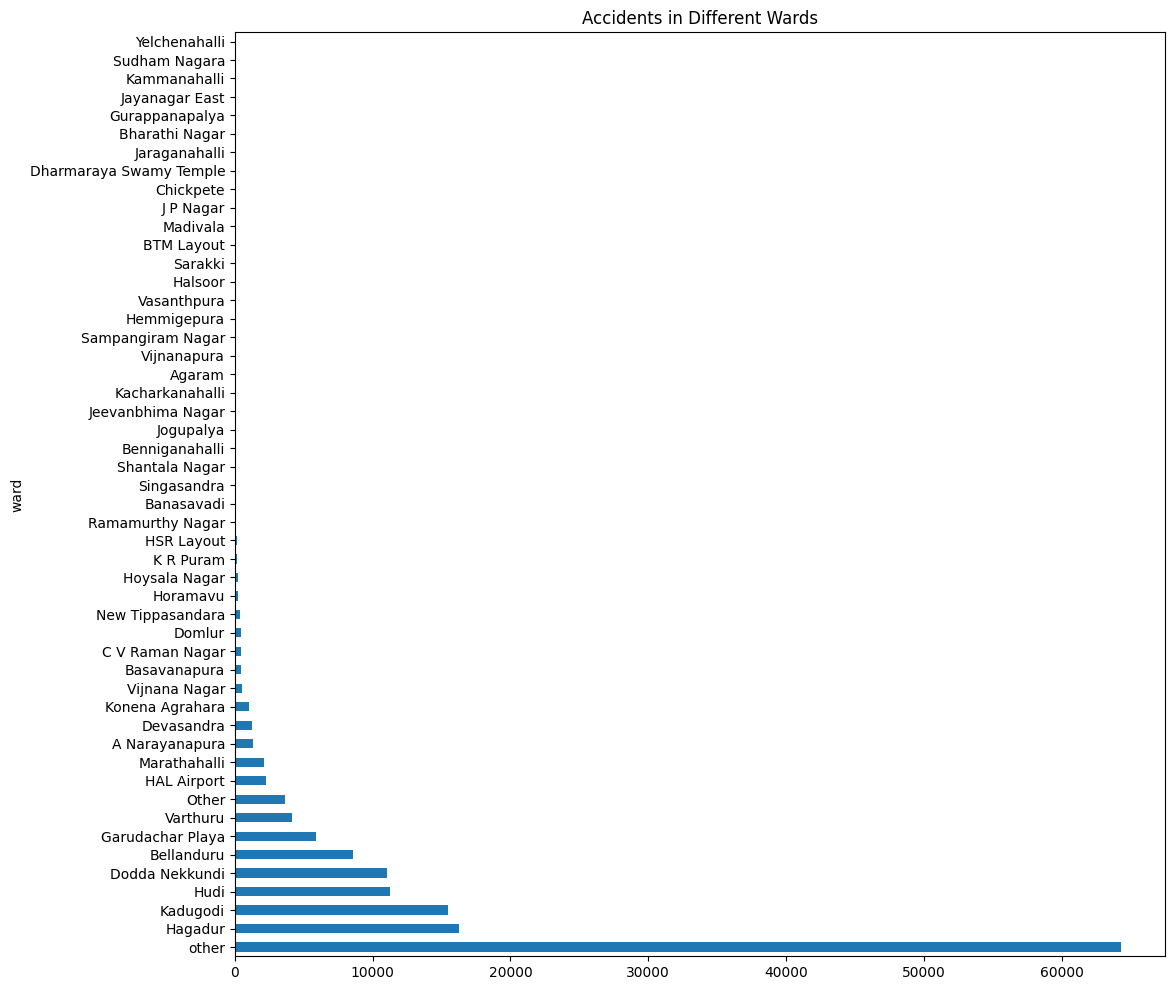

In [33]:
traffic_df['ward'].value_counts().plot(
    kind='barh',
    figsize=(12,12),
    title="Accidents in Different Wards"
)


<Axes: title={'center': 'Rush vs Non-Rush Hour Violations'}, xlabel='Rush_Hour_Time'>

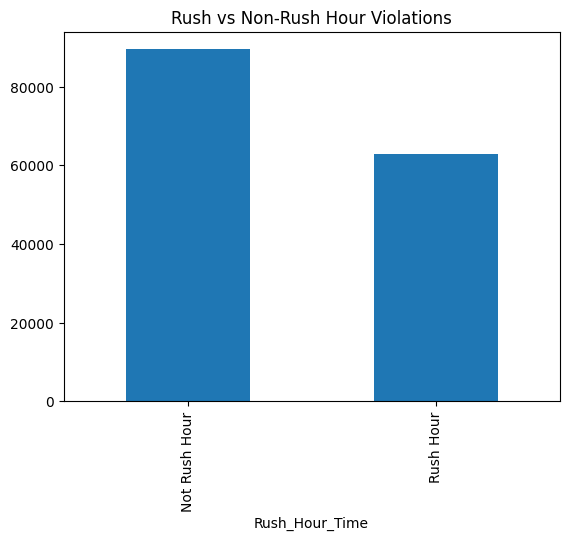

In [34]:
traffic_df['Rush_Hour_Time'].value_counts().plot(kind='bar', title="Rush vs Non-Rush Hour Violations")

# Spatial Hotspot Analysis

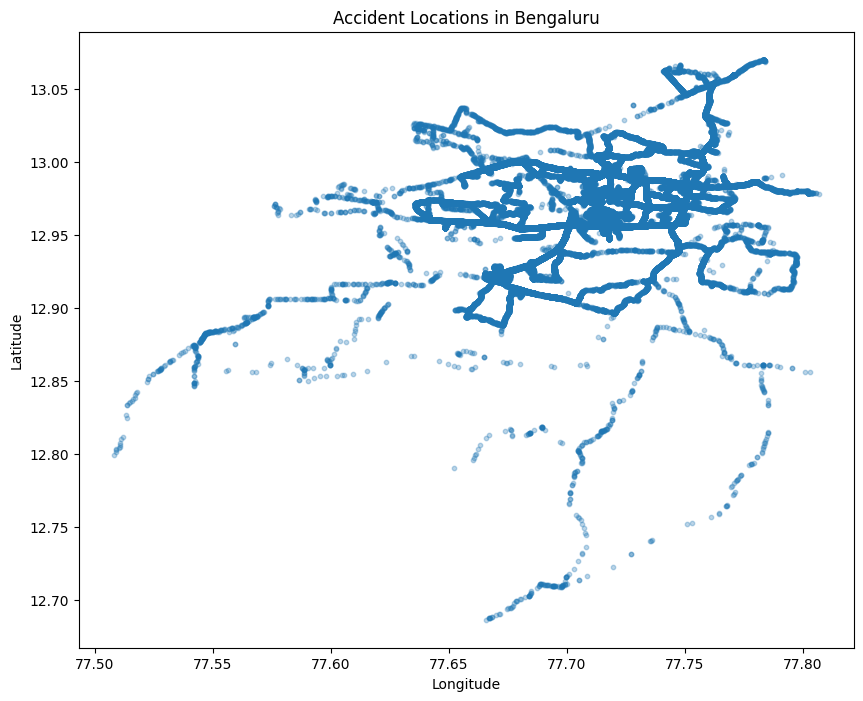

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(traffic_df['longitude'], traffic_df['latitude'], alpha=0.3, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Locations in Bengaluru")
plt.show()


In [36]:
import folium
from folium.plugins import HeatMap

# Center map around Bengaluru
m = folium.Map(location=[12.97, 77.59], zoom_start=11)

# Prepare data: [[lat, lon, weight]]
heat_data = [[row['latitude'], row['longitude']] for index, row in traffic_df.iterrows()]

# Add heatmap
HeatMap(heat_data, radius=10).add_to(m)

# Display
m

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np

coords = traffic_df[['latitude', 'longitude']].to_numpy()

# DBSCAN clustering
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian  # 0.5 km
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

traffic_df['cluster'] = db.labels_

# Check cluster counts
traffic_df['cluster'].value_counts()


cluster
 0     151280
 2        431
-1        102
 17        86
 6         69
 18        51
 10        36
 11        31
 7         20
 15        20
 1         14
 23        13
 16        13
 14        12
 12        12
 22        11
 3         10
 4         10
 21        10
 24        10
 20         8
 5          6
 8          6
 9          5
 13         5
 19         5
Name: count, dtype: int64

In [38]:
traffic_df['lat_bin'] = traffic_df['latitude'].round(3)
traffic_df['lon_bin'] = traffic_df['longitude'].round(3)

# Aggregate accidents per grid cell per hour
agg = traffic_df.groupby(['lat_bin', 'lon_bin', 'hour']).size().reset_index(name='accident_count')

# Binary target: 1 if accidents > 0, else 0
agg['target'] = agg['accident_count'].apply(lambda x: 1 if x > 0 else 0)


In [39]:
# Example features
X = agg[['lat_bin', 'lon_bin', 'hour']]  # you can also add 'day_of_week', 'month'
y = agg['target']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2476

    accuracy                           1.00      2476
   macro avg       1.00      1.00      1.00      2476
weighted avg       1.00      1.00      1.00      2476



In [42]:
agg['pred_prob'] = model.predict_proba(agg[['lat_bin','lon_bin','hour']])[:,:]


In [43]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[12.97, 77.59], zoom_start=11)
heat_data = [[row['lat_bin'], row['lon_bin'], row['pred_prob']] for i, row in agg.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)
m

In [44]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.0 MB/s eta 0:00:00


In [45]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np

st.title("Accident Risk Prediction")
st.write("🚦 Predict accident-prone areas based on location & time")

# Example inputs
lat = st.number_input("Latitude", value=12.9716)
lon = st.number_input("Longitude", value=77.5946)
hour = st.slider("Hour of Day", 0, 23, 12)

# Dummy prediction (replace with your trained model later)
prob = np.random.rand()
st.metric("Predicted Accident Risk", f"{prob:.2f}")


Writing app.py


In [47]:
#ngrok config add-authtoken 326OKBY9qMisywIu4GyKG56H3d0_2c7QQ9m14CRBkLgdwAceQ
!pip install pyngrok
from pyngrok import ngrok

# Replace with your token
!ngrok config add-authtoken 326OKBY9qMisywIu4GyKG56H3d0_2c7QQ9m14CRBkLgdwAceQ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [48]:
# Kill previous tunnels if any
ngrok.kill()

# Run Streamlit in background
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Expose public URL
public_url = ngrok.connect(8501)
print("Your app is live here:", public_url)


Your app is live here: NgrokTunnel: "https://368bc4ee8d27.ngrok-free.app" -> "http://localhost:8501"


In [49]:
code = """
ngrok.kill()

# Run Streamlit in background
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Expose public URL
public_url = ngrok.connect(8501)
print("Your app is live here:", public_url)
"""
with open("app.py", "w") as f:
    f.write(code)
